In [1]:
import keras
from src.utilities import load_data_as_set_of_particles
from src.Models.MLP import MLP
from src.Models.PointNet import PointNet
from src import utilities

#### Loading the Data

In [2]:
# Creating the trainning, validation and test set
X_train, y_train = load_data_as_set_of_particles("../Data/HiggsTrainning.csv")
X_val, y_val = load_data_as_set_of_particles("../Data/HiggsValidation.csv")
X_test, y_test = load_data_as_set_of_particles("../Data/HiggsTest.csv")

#### Defining the Model

In [11]:
# Defining the MLP that will be used for all the particles
input_mlp = keras.layers.Input(shape=[7])
mlp = MLP(num_neurons=32)
mlp_model = keras.Model(inputs=input_mlp, outputs=mlp(input_mlp))

# creating the PointNet
input_point_net = keras.layers.Input(shape=[6, 7])
point_net = PointNet(mlp_model)(input_point_net)
output_layer = keras.layers.Dense(2, activation='softmax')(point_net)

# final model
model = keras.Model(inputs=input_point_net, outputs=output_layer)
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 6, 7)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ point_net_1 (PointNet)          │ (None, 64)             │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,994 (19.51 KB)

 Trainable params: 4,802 (18.76 KB)

 Non-trainable params: 192 (768.00 B)

In [12]:
model.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 533us/step - accuracy: 0.5447 - loss: 0.6861 - val_accuracy: 0.5888 - val_loss: 0.6643
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.5883 - loss: 0.6669 - val_accuracy: 0.6074 - val_loss: 0.6531
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step - accuracy: 0.6022 - loss: 0.6576 - val_accuracy: 0.6156 - val_loss: 0.6484
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.6101 - loss: 0.6526 - val_accuracy: 0.6135 - val_loss: 0.6509
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 499us/step - accuracy: 0.6148 - loss: 0.6492 - val_accuracy: 0.6136 - val_loss: 0.6488
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 0.6144 - loss: 0.6490 - val_accuracy: 0.6127 - val_loss: 0.6495
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step - accuracy: 0.6174 - loss: 0.6475 - val_accuracy: 0.6189 - val_loss: 0.6449
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 494us/step - accuracy: 

#### Quick checks

In [13]:
# perfoming the prediction
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 239us/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step
626/626 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step


In [14]:
print("Trainnig set:")
utilities.display_metrics(y_true=y_train, y_pred=y_train_pred)
print("Validation set:")
utilities.display_metrics(y_true=y_val, y_pred=y_val_pred)
print("Test set:")
utilities.display_metrics(y_true=y_test, y_pred=y_test_pred)

Trainnig set:
Recall: 0.5824
Precision: 0.6848
Confusion Matrix:
[[25693  8097]
 [12617 17593]]
Validation set:
Recall: 0.5618
Precision: 0.6596
Confusion Matrix:
[[6251 2191]
 [3312 4246]]
Test set:
Recall: 0.5622
Precision: 0.6571
Confusion Matrix:
[[7844 2758]
 [4115 5284]]


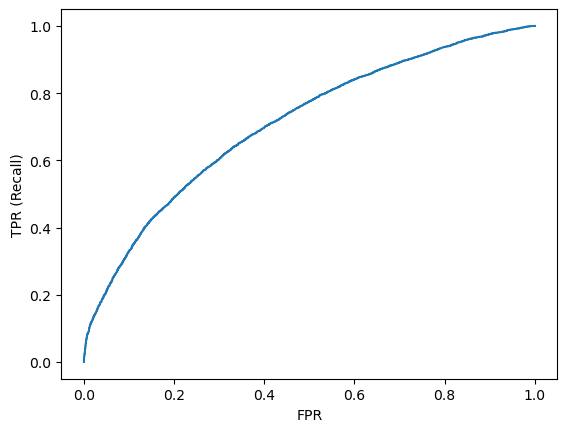

AUC: 0.7099


In [15]:
utilities.display_roc_curve(y_true=y_val, y_pred=y_val_pred)

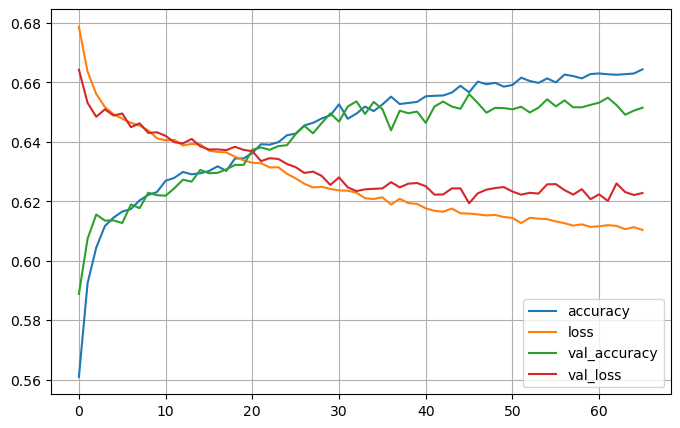

In [16]:
utilities.plot_hist_trainning(history)

In [17]:
utilities.save_model(model, history, "ModelFiles/PointNet")